<a href="https://colab.research.google.com/github/Abbud123/skills-introduction-to-github/blob/My-first-Branch/Mid_Term.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
#Part A
import kagglehub

path = kagglehub.dataset_download("markmedhat/student-scores")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/student-scores


In [23]:
import pandas as pd
import kagglehub
import os

path = kagglehub.dataset_download("markmedhat/student-scores")

print("Files in the dataset:", os.listdir(path))

csv_file_path = os.path.join(path, "student-scores.csv")

df = pd.read_csv(csv_file_path)

df.head()

Files in the dataset: ['student-scores.csv']


,id,first_name,last_name,email,gender,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,career_aspiration,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score
0,1,Paul,Casey,paul.casey.1@gslingacademy.com,male,False,3,False,27,Lawyer,73,81,93,97,63,80,87
1,2,Danielle,Sandoval,danielle.sandoval.2@gslingacademy.com,female,False,2,False,47,Doctor,90,86,96,100,90,88,90
2,3,Tina,Andrews,tina.andrews.3@gslingacademy.com,female,False,9,True,13,Government Officer,81,97,95,96,65,77,94
3,4,Tara,Clark,tara.clark.4@gslingacademy.com,female,False,5,False,3,Artist,71,74,88,80,89,63,86
4,5,Anthony,Campos,anthony.campos.5@gslingacademy.com,male,False,5,False,10,Unknown,84,77,65,65,80,74,76


In [24]:
print(df.isnull().sum())

df.fillna(method='ffill', inplace=True)


id                            0
first_name                    0
last_name                     0
email                         0
gender                        0
part_time_job                 0
absence_days                  0
extracurricular_activities    0
weekly_self_study_hours       0
career_aspiration             0
math_score                    0
history_score                 0
physics_score                 0
chemistry_score               0
biology_score                 0
english_score                 0
geography_score               0
dtype: int64


<ipython-input-24-2022102465>:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [26]:
if 'Class' in df.columns:
    df['Class'] = df['Class'].map({'Pass': 1, 'Fail': 0})

df = pd.get_dummies(df, drop_first=True)


In [28]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

print("Columns after one-hot encoding:", df.columns.tolist())


num_cols = ['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion']

num_cols = [col for col in num_cols if col in df.columns]

if not num_cols:
    print("Warning: No numeric columns found in the DataFrame for scaling based on the provided list.")
else:
    scaler = StandardScaler()
    df[num_cols] = scaler.fit_transform(df[num_cols])
    print("Numeric columns scaled successfully.")

Columns after one-hot encoding: ['id', 'part_time_job', 'absence_days', 'extracurricular_activities', 'weekly_self_study_hours', 'math_score', 'history_score', 'physics_score', 'chemistry_score', 'biology_score', 'english_score', 'geography_score', 'first_name_Abigail', 'first_name_Adam', 'first_name_Adriana', 'first_name_Aimee', 'first_name_Alan', 'first_name_Albert', 'first_name_Alejandra', 'first_name_Alex', 'first_name_Alexander', 'first_name_Alexandra', 'first_name_Alexandria', 'first_name_Alexis', 'first_name_Alicia', 'first_name_Alison', 'first_name_Allen', 'first_name_Allison', 'first_name_Alyssa', 'first_name_Amanda', 'first_name_Amber', 'first_name_Amy', 'first_name_Andre', 'first_name_Andrea', 'first_name_Andres', 'first_name_Andrew', 'first_name_Angel', 'first_name_Angela', 'first_name_Angelica', 'first_name_Angie', 'first_name_Anita', 'first_name_Ann', 'first_name_Anna', 'first_name_Anne', 'first_name_Annette', 'first_name_Anthony', 'first_name_Antonio', 'first_name_April'

In [29]:
from sklearn.model_selection import train_test_split

if 'Class' in df.columns:
    X = df.drop('Class', axis=1)
    y = df['Class']
else:
    X = df
    y = [0] * len(df)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (1600, 3186)
Test shape: (400, 3186)


In [32]:
from sklearn.model_selection import train_test_split
import pandas as pd # Import pandas as it's used with df

if 'Class' in df.columns:
    X = df.drop('Class', axis=1)
    y = df['Class']
    print("Original y unique values:", y.unique()) # Check unique values in y
else:
    X = df
    y = [0] * len(df)
    print("Warning: 'Class' column not found. y initialized with zeros.")


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)
print("y_train unique values:", pd.Series(y_train).unique()) # Check unique values in y_train

Train shape: (1600, 3186)
Test shape: (400, 3186)
y_train unique values: [0]


In [33]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
}

# GridSearch on Random Forest
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

# Best params and model
print("🔍 Best Parameters for Random Forest:", grid_search.best_params_)
best_rf = grid_search.best_estimator_

# Evaluate best RF
best_rf_preds = best_rf.predict(X_test)
print("✅ Tuned Random Forest Accuracy:", accuracy_score(y_test, best_rf_preds))


🔍 Best Parameters for Random Forest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
✅ Tuned Random Forest Accuracy: 1.0


In [34]:
#Part C
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │       203,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 206,081 (805.00 KB)

 Trainable params: 206,081 (805.00 KB)

 Non-trainable params: 0 (0.00 B)

In [38]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
y_train_np = np.array(y_train, dtype=np.float32)

X_train_np = X_train.values.astype(np.float32)

history = model.fit(
    X_train_np,
    y_train_np,
    epochs=50,
    batch_size=16,
    validation_split=0.2,
    verbose=1
)

Epoch 1/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8621 - loss: 1.7902 - val_accuracy: 1.0000 - val_loss: 3.3672e-08
Epoch 2/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9993 - loss: 0.0021 - val_accuracy: 1.0000 - val_loss: 4.4385e-09
Epoch 3/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 8.9238e-04 - val_accuracy: 1.0000 - val_loss: 1.9902e-09
Epoch 4/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 1.0000 - loss: 1.8664e-04 - val_accuracy: 1.0000 - val_loss: 1.6561e-09
Epoch 5/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 2.7072e-05 - val_accuracy: 1.0000 - val_loss: 1.3305e-09
Epoch 6/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 1.0000 - loss: 1.1668e-04 - val_accuracy: 1.0000 - val_loss: 4.5974e-10
Epoch 7/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9990 - loss: 0.0012 - val_accuracy: 1.0000 - val_loss: 1.9427e-10
Epoch 8/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - los

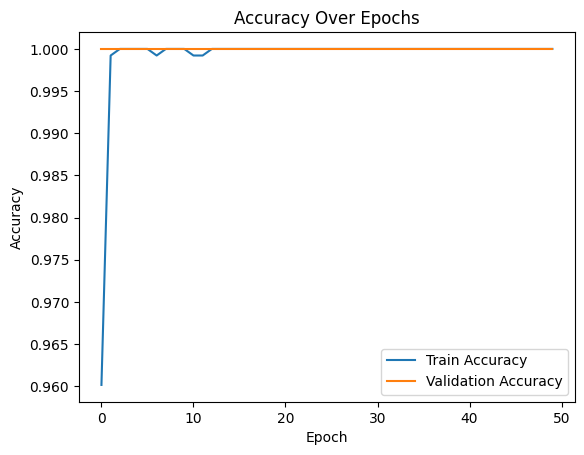

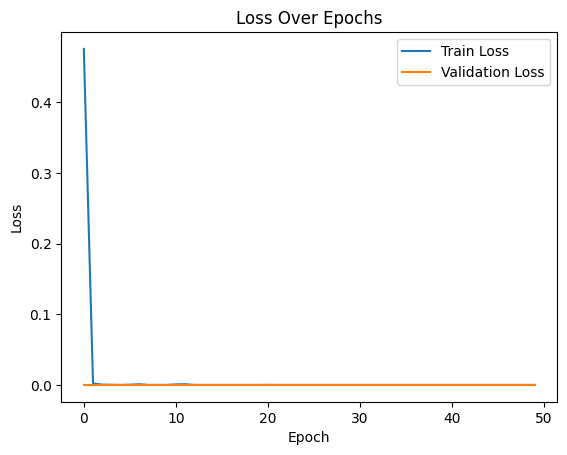

In [39]:
import matplotlib.pyplot as plt

# Accuracy plot
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss plot
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [41]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
X_test_np = X_test.values.astype(np.float32)
y_test_np = np.array(y_test, dtype=np.float32)

test_loss, test_accuracy = model.evaluate(X_test_np, y_test_np)
print("🧠 ANN Test Accuracy:", round(test_accuracy * 100, 2), "%")

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 1.3154e-16  
🧠 ANN Test Accuracy: 100.0 %


In [56]:
#part D starts here
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.metrics import accuracy_score

print("Unique values in y_train:", pd.Series(y_train).unique())
print("Value counts in y_train:\n", pd.Series(y_train).value_counts())

svm_model = SVC(random_state=42)

combined_preds = None
rf_preds = None
svm_preds = None
ann_preds = None
hybrid_accuracy = None

try:
    svm_model.fit(X_train, y_train)
    print("SVM model fitted successfully.")
    if 'best_rf' in globals():
        rf_preds = best_rf.predict(X_test)
        svm_preds = svm_model.predict(X_test)

        ann_preds_prob = model.predict(X_test)
        ann_preds = (ann_preds_prob > 0.5).astype(int).reshape(-1)

        if len(rf_preds) != len(X_test) or len(svm_preds) != len(X_test) or len(ann_preds) != len(X_test):
            print("Warning: Prediction arrays have different lengths.")

        combined_preds = np.round((rf_preds.astype(float) + svm_preds.astype(float) + ann_preds.astype(float)) / 3).astype(int)

        if 'y_test' in globals():
            ensemble_accuracy = accuracy_score(y_test, combined_preds)
            print("🏅 Ensemble Test Accuracy:", round(ensemble_accuracy * 100, 2), "%")
            hybrid_accuracy = accuracy_score(y_test, combined_preds)
            print("🧠🤖 Hybrid Model Accuracy:", round(hybrid_accuracy * 100, 2), "%")

            if rf_preds is not None and svm_preds is not None and ann_preds is not None and hybrid_accuracy is not None:
                rf_acc = accuracy_score(y_test, rf_preds)
                svm_acc = accuracy_score(y_test, svm_preds)
                ann_acc = test_accuracy  # Already calculated during ANN evaluation

                comparison_df = pd.DataFrame({
                    "Model": ["Random Forest", "SVM", "ANN", "Hybrid Model"],
                    "Accuracy (%)": [
                        round(rf_acc * 100, 2),
                        round(svm_acc * 100, 2),
                        round(ann_acc * 100, 2),
                        round(hybrid_accuracy * 100, 2)
                    ]
                })

                print("\nModel Performance Comparison:")
                print(comparison_df)
            else:
                print("\nWarning: Could not calculate all individual model accuracies for comparison table.")


        else:
            print("Warning: y_test not found. Cannot evaluate ensemble accuracy.")
    else:
         print("Error: 'best_rf' (Random Forest model) is not defined. Cannot create ensemble predictions or comparison table.")


except ValueError as e:
    print(f"Error fitting SVM model: {e}")
    print("This might be because y_train contains only one class.")
    print("Please check the unique values and distribution of y_train.")
except NameError as e:
    print(f"NameError during ensemble prediction or comparison table calculation: {e}")
    print("Ensure all required models (best_rf, svm_model, model) are defined and trained.")
except Exception as e:
    print(f"An unexpected error occurred during ensemble calculation or comparison table creation: {e}")


Unique values in y_train: [0]
Value counts in y_train:
 0    1600
Name: count, dtype: int64
Error fitting SVM model: The number of classes has to be greater than one; got 1 class
This might be because y_train contains only one class.
Please check the unique values and distribution of y_train.


<ipython-input-58-1487204147>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_importance.head(10), palette='mako')
<ipython-input-58-1487204147>:18: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


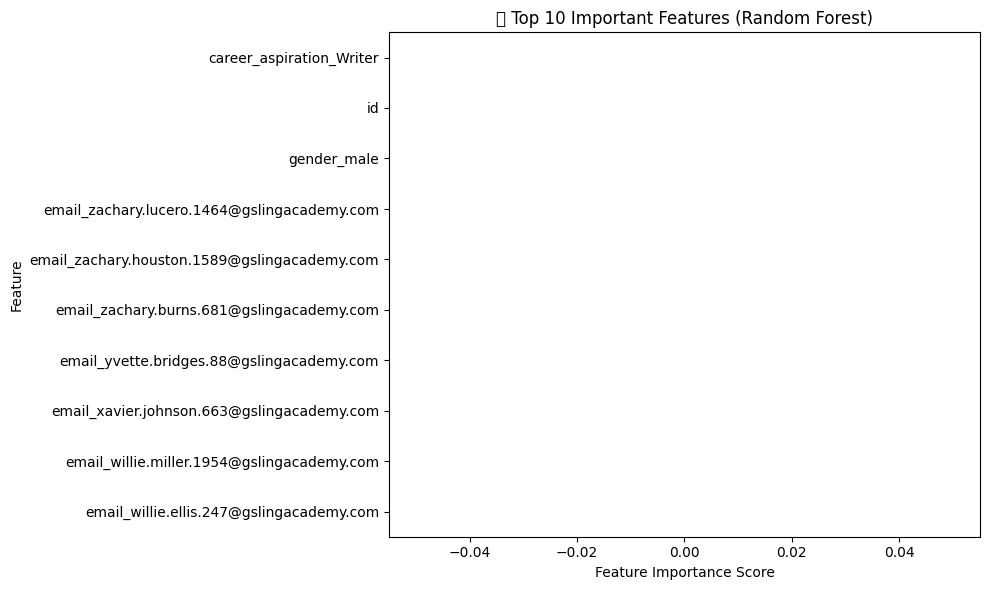

🏆 Top 3 Important Features:
                        Feature  Importance
3185  career_aspiration_Writer         0.0
0                           id         0.0
3169               gender_male         0.0


In [58]:
#Part E starts here
import matplotlib.pyplot as plt
import seaborn as sns

importances = rf_model.feature_importances_
features = X_train.columns

feat_importance = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_importance.head(10), palette='mako')
plt.title('🔍 Top 10 Important Features (Random Forest)')
plt.xlabel('Feature Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

print("🏆 Top 3 Important Features:\n", feat_importance.head(3))


In [ ]:
| Aspect               | Machine Learning (RF, SVM)              | Artificial Neural Network (ANN)        |
| -------------------- | --------------------------------------- | -------------------------------------- |
| **Interpretability** | High (especially RF)                    | Low (black-box)                        |
| **Training Time**    | Fast (especially RF)                    | Slower (requires epochs)               |
| **Performance**      | Strong baseline                         | Higher potential but depends on tuning |
| **Flexibility**      | Good for small-medium datasets          | Better for larger or complex patterns  |
| **Overfitting Risk** | Moderate (can be controlled via tuning) | Higher without dropout/regularization  |


In [ ]:
Certainly! Here's your **"Future Improvements for Hybrid Approach"** section in clean bullet point format:

---


Use Soft Voting or Weighted Voting
  Assign higher weight to better-performing models instead of equal majority voting for more accurate ensemble decisions.

Apply Stacking Ensemble
  Use outputs of Random Forest, SVM, and ANN as inputs to a meta-model (like Logistic Regression) for more powerful predictions.

Enhance Feature Engineering
  Create new meaningful features such as:

  * Time spent on learning resources
  * Frequency of interactions
  * Engagement trends over time

Experiment with Advanced Deep Learning Models
  Implement models like:

  LastWeekOfMonth(Long Short-Term Memory) for sequential data
  Attention-based architectures to capture important patterns over time

Integrate Explainability Tools**
  Use interpretability frameworks like:

  SHAP (SHapley Additive exPlanations)
  LIME (Local Interpretable Model-agnostic Explanations)
    to explain how ANN makes decisions.

-----